<a href="https://colab.research.google.com/github/ppjotrek/EOG-project/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

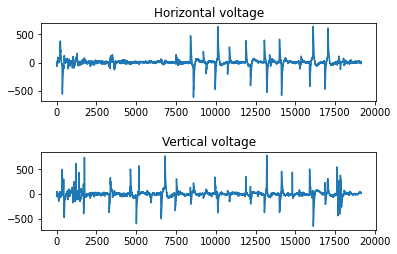

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('record_data.txt', sep=',', names=['Time', 'Horizontal', 'Vertical'])

data_length = len(data['Time'])

fig, ax = plt.subplots(2, 1)
fig.tight_layout(pad = 3.0)

plt.subplot(2, 1, 1)
plt.title('Horizontal voltage')
plt.plot(data['Horizontal'])

plt.subplot(2, 1, 2)
plt.title('Vertical voltage')
plt.plot(data['Vertical'])

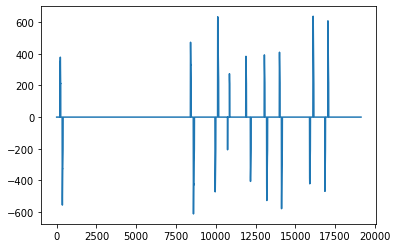

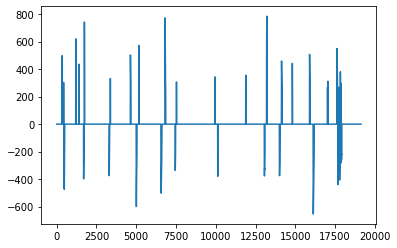

In [30]:
mean_horizontal = np.mean(data['Horizontal'])
mean_vertical = np.mean(data['Vertical'])

max_horizontal = np.max(data['Horizontal'])
max_vertical = np.max(data['Vertical'])
min_horizontal = np.min(data['Horizontal'])
min_vertical = np.min(data['Vertical'])

horizontal_threshold_pos = (max_horizontal - mean_horizontal) / 3
horizontal_threshold_neg = (mean_horizontal - np.abs(min_horizontal)) / 3
vertical_threshold_pos = (max_vertical - mean_vertical) / 3
vertical_threshold_neg = (mean_vertical - np.abs(min_vertical)) / 3

output_horizontal = np.zeros(data_length)
output_vertical = np.zeros(data_length)

for i in range(data_length):
  if(data['Horizontal'][i] >= horizontal_threshold_pos):
    output_horizontal[i] = data['Horizontal'][i]
  elif(data['Horizontal'][i] <= horizontal_threshold_neg):
    output_horizontal[i] = data['Horizontal'][i]

for i in range(data_length):
  if(data['Vertical'][i] >= vertical_threshold_pos):
    output_vertical[i] = data['Vertical'][i]
  elif(data['Vertical'][i] <= vertical_threshold_neg):
    output_vertical[i] = data['Vertical'][i]

output_horizontal_binary = np.zeros(data_length)
output_vertical_binary = np.zeros(data_length)

for i in range(data_length):
  if(data['Horizontal'][i] >= horizontal_threshold_pos):
    output_horizontal_binary[i] = 1
  elif(data['Horizontal'][i] <= horizontal_threshold_neg):
    output_horizontal_binary[i] = -1

for i in range(data_length):
  if(data['Vertical'][i] >= vertical_threshold_pos):
    output_vertical_binary[i] = 1
  elif(data['Vertical'][i] <= vertical_threshold_neg):
    output_vertical_binary[i] = -1

plt.figure()
plt.plot(output_horizontal)
plt.figure()
plt.plot(output_vertical)